<a href="https://colab.research.google.com/github/kabil3399/loan_prediction/blob/main/Loan_Prediction__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction

This project was started as a motivation for learning Machine Learning Algorithms and to learn the different data preprocessing techniques such as Exploratory Data Analysis, Feature Engineering, Feature Selection, Feature Scaling and finally to build a machine learning model.

In this project we are going to classify an individual whether he/she able to get the loan amount based on his/her Income, Education, Working Experience, Loan which is taken previously and many more factors. Let's get more into it by looking at the data.

The dataset is collected from [Kaggle](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset). Without any delay, Let's get into the data.

In [1]:
# TODO : Import necessary python libraries needed for this project

# For Data preparation and manipulation
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Set Seaborn styles
sb.set()

# For implementing pipeline
from sklearn.pipeline import Pipeline

# For Scaling the data
from sklearn.preprocessing import StandardScaler

# For Classification
from sklearn.neighbors import KNeighborsClassifier

# For Splitting the data for training and Validation
from sklearn.model_selection import train_test_split

# For creating model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Principal Component Analysis for Dimensionality Reduction
from sklearn.decomposition import PCA

# For Shuffling the DataFrame
from sklearn.utils import shuffle

In [2]:
# TODO : Load previous individuals loan data
loan_train = pd.read_csv('train.csv')

In [3]:
loan_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# TODO : Let's know how many factors of an individual and Number of Samples
print("The Loan Prediction Dataset has")
print("\t\tNumber of Factors : \t", loan_train.shape[1] - 1)
print("\t\tNumber of Samples : \t", loan_train.shape[0])

The Loan Prediction Dataset has
		Number of Factors : 	 12
		Number of Samples : 	 614


# Exploratory Data Analysis

#### Let's do some descriptive statistics

In [5]:
# TODO : Descriptive Statistics on Loan Data
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# TODO : Print the factors of Loan Data
print('Loan Data Factors : \n')
j = 1
for i in loan_train.columns:
    print(j, '.', i)
    j += 1

Loan Data Factors : 

1 . Loan_ID
2 . Gender
3 . Married
4 . Dependents
5 . Education
6 . Self_Employed
7 . ApplicantIncome
8 . CoapplicantIncome
9 . LoanAmount
10 . Loan_Amount_Term
11 . Credit_History
12 . Property_Area
13 . Loan_Status


## Let's check the dataset is Balanced or Imbalanced

In [7]:
# Let's check is there any null values on Loan_Status
loan_train['Loan_Status'].isnull().sum()

0

In [8]:
# TODO : To get unique values and value_counts on Loan_Status
print("Unique values : ", loan_train['Loan_Status'].unique())
print("Unique values counts : \n", loan_train['Loan_Status'].value_counts())

Unique values :  ['Y' 'N']
Unique values counts : 
 Y    422
N    192
Name: Loan_Status, dtype: int64


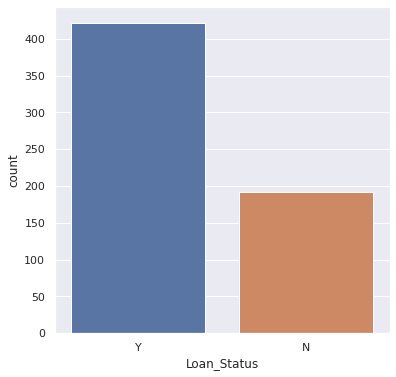

In [ ]:
# Let's plot the Unique value counts
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Status', data = loan_train)
# plt.savefig('/loan_status_counts.png')

- Hence it is a Imbalanced Dataset. 
- Two-third of Loan_Status is having `Yes` value.
- One-third of Loan_Status is having `No` value.

Two methods for handling Imbalanced Dataset.
- Increase rejected applicants i.e., Loan_Status having `No` values
- Remove accepted applicants i.e., Loan_Status `Yes` values

#### The goal is to remove the samples havin null values in any of the columns and Loan_Status must be Yes

In [9]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# columns_having_null_values = ['Gender', 'Married', 'Dependents', 'Self_Employed',
#                               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
# for column in columns_having_null_values:
#     samples_index_to_be_dropped = loan_train[loan_train[column].isnull()]
#     samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
#     loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
#     loan_train.reset_index(drop = True, inplace = True)
    
# columns_having_outliers = {'ApplicantIncome':25000, 'CoapplicantIncome':15000, 'LoanAmount':400}
# for column in columns_having_outliers:
#     samples_index_to_be_dropped = loan_train[loan_train[column] > columns_having_outliers[column]]
#     samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
#     loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
#     loan_train.reset_index(drop = True, inplace = True)

In [10]:
loan_train.shape

(614, 13)

## Feature Engineering

### TODO : Let's Explore each and every factors

<br><br><br><br>

#### 1. Loan_ID

In [11]:
# 1. Loan ID
loan_train['Loan_ID'].describe()

count          614
unique         614
top       LP001002
freq             1
Name: Loan_ID, dtype: object

Each Loan taken individual having their own individual Loan_ID. But we know the fact, in anyway an individual's Loan_ID is not going to create an impact on their Loan Status. So we can eliminate this column.

<br><br><br>

#### 2. Gender

In [12]:
# TODO : Describe Gender column
loan_train['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [13]:
print("Number of null values : ", loan_train['Gender'].isnull().sum())
print("Unique values : ", loan_train['Gender'].unique())
print("Value counts : \n", loan_train['Gender'].value_counts())

Number of null values :  13
Unique values :  ['Male' 'Female' nan]
Value counts : 
 Male      489
Female    112
Name: Gender, dtype: int64


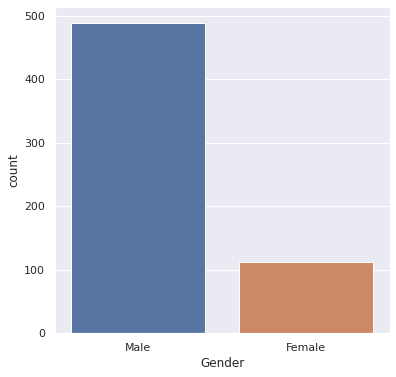

In [14]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train)
# plt.savefig('../images/gender_counts_0.png')

In [15]:
# TODO : Print the samples having null values in gender column
samples_with_null_values_on_gender_column = loan_train[loan_train['Gender'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
# samples_index_to_be_dropped = loan_train[loan_train['Gender'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

- Most of these people are married. So we can't fill Gender based on `Married` column.
- Most of these people are graduated. So we can't fill Gender based on `Education` column.
- Most of these people are self employed. So we can't fill Gender based on `Self_Employed` column.
- Most of these people are having `Credit_History` and `Loan_Amount_Term` as 360 days(1 year).
- Since we are going to predict applicant's Gender, we can omit CoapplicantIncome
- So we are going predict the Gender based on `Dependents`, `ApplicantIncome`, `LoanAmount`, and `Property_Area`

In [ ]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Married')
# plt.savefig('../images/gender_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/gender_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Education')
# plt.savefig('../images/gender_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/gender_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/gender_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/gender_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/gender_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/gender_counts_8.png')
# plt.show()

In [16]:
# Initialize Gender predictor columns list
GENDER_PREDICTOR_COLUMNS = ['Dependents', 'ApplicantIncome', 'LoanAmount', 'Property_Area', 'Gender']

# Let's get the rows not having null values on gender column
samples_without_null_values_on_gender_column = loan_train[~loan_train['Gender'].isnull()][GENDER_PREDICTOR_COLUMNS]
print("Number of Samples Before dropping samples having null values in predictor columns for Gender column: ", 
     samples_without_null_values_on_gender_column.shape[0])

# Dropping samples having null values in predictor columns
samples_without_null_values_on_gender_column = samples_without_null_values_on_gender_column.dropna(how = 'any')
print("Number of Samples After dropping samples having null values in predictor columns for Gender column: ", 
     samples_without_null_values_on_gender_column.shape[0])

# Conveting categorical values on Dependents column to numerical values
samples_without_null_values_on_gender_column['Dependents'] = samples_without_null_values_on_gender_column['Dependents'].apply(
    lambda x : {'0': 0, '1':1, '2':2, '3+':3}[x]
)
# Conveting categorical values on Property_Area column to numerical values
samples_without_null_values_on_gender_column['Property_Area'] = samples_without_null_values_on_gender_column['Property_Area'].apply(
    lambda x : {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[x]
)

# Building Gender Predictor using Pipeline and KNeigborsClassifiers
Gender_predictor = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('gen_predictor', KNeighborsClassifier(n_neighbors = 1))
])
Gender_predictor.fit(samples_without_null_values_on_gender_column.iloc[:, :-1].values,
                    samples_without_null_values_on_gender_column.iloc[:, -1].values)

Number of Samples Before dropping samples having null values in predictor columns for Gender column:  601
Number of Samples After dropping samples having null values in predictor columns for Gender column:  566


Pipeline(steps=[('scaler', StandardScaler()),
                ('gen_predictor', KNeighborsClassifier(n_neighbors=1))])

In [17]:
# Function which fills null values on Gender column
def gender_null_value_filler(df, Gender_predictor):
    for row in range(df.shape[0]):
        if df.loc[row, 'Gender'] is np.nan:
            X = loan_train.loc[row, GENDER_PREDICTOR_COLUMNS[:-1]].values.reshape(1, -1)
            X[0][0] = {'0': 0, '1':1, '2':2, '3+':3}[X[0][0]]
            X[0][3] = {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[X[0][3]]
            df.loc[row, 'Gender'] = Gender_predictor.predict(X)
    return df

In [18]:
# TODO : Filling null values on Gender columns optimally
loan_train = gender_null_value_filler(loan_train, Gender_predictor)

In [19]:
# TODO : Encoding Gender Column - Male : 1, Female : 0
loan_train['Gender'] = loan_train.Gender.apply(lambda x : {'Male': 1, 'Female' : 0}[x])

In [20]:
loan_train['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int64

<br><br><br>

#### 3. Married

In [21]:
# TODO : Describing Married column
loan_train['Married'].describe()

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

In [22]:
print("Number of null values : ", loan_train['Married'].isnull().sum())
print("Unique values : ", loan_train['Married'].unique())
print("Value counts : \n", loan_train['Married'].value_counts())

Number of null values :  3
Unique values :  ['No' 'Yes' nan]
Value counts : 
 Yes    398
No     213
Name: Married, dtype: int64


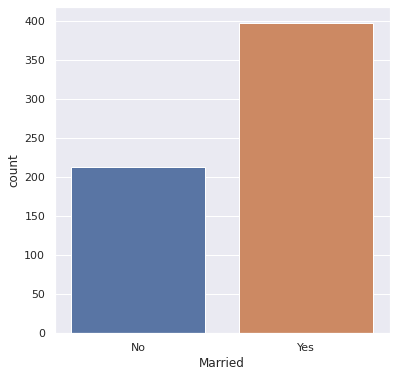

In [23]:
# Let's plot the Unique value counts
plt.figure(figsize = (6, 6))
sb.countplot(x = 'Married', data = loan_train)
# plt.savefig('../images/married_counts_0.png')

#### There are three samples having null values on married column.
#### Let's get the samples having null values.

In [ ]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Gender')
# plt.savefig('../images/married_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/married_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Education')
# plt.savefig('../images/married_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/married_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/married_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/married_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/married_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/married_counts_8.png')
# plt.show()

In [24]:
# TODO : Print the samples having null values in married column
samples_with_null_values_on_married_column = loan_train[loan_train['Married'].isnull()]
samples_with_null_values_on_married_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,1,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,1,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,0,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
# samples_index_to_be_dropped = loan_train[loan_train['Married'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [25]:
loan_train[loan_train['Married'] == 'Yes'].describe(include = 'all').iloc[:, :]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,398,398.000000,398,390,398,380,398.000000,398.000000,384.000000,389.000000,362.000000,398,398
unique,398,NaN,1,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,NaN,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,NaN,398,174,309,326,NaN,NaN,NaN,NaN,NaN,151,285
mean,NaN,0.922111,NaN,NaN,NaN,NaN,5629.173367,1794.632965,155.750000,336.987147,0.842541,NaN,NaN
std,NaN,0.268335,NaN,NaN,NaN,NaN,6989.254425,2039.962354,89.934267,66.739163,0.364737,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,12.000000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,2817.500000,0.000000,108.000000,360.000000,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,3854.500000,1625.000000,132.000000,360.000000,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,5820.500000,2464.000000,178.500000,360.000000,1.000000,NaN,NaN


- There are 398 married applicants, among them 309 are Graduated, 326 are Not Self_Employed, 151 semi-urban.
- From this, we can assume that all missing samples as Married.

In [26]:
# Let's fill null values in Married columns with 'Yes'
loan_train['Married'] = loan_train['Married'].fillna('Yes')

In [27]:
# TODO : To know the unique value counts
loan_train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

- Since most of the applicant are married, we are going to encode Yes with 1 and No with 0

In [28]:
# TODO : encoding categorical values into numerical values
loan_train['Married'] = loan_train['Married'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

<br><br><br>
##### 4. Dependents

In [29]:
# TODO : Describing Dependents column
loan_train['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

- From my thought, Dependents may be representing children.
- If the applicant is not married, then we are going to fill that null value with 0
- If the applicant is married, then we are going to fill that null value with 1

In [30]:
print("Number of null values : ", loan_train['Dependents'].isnull().sum())
print("Unique values : ", loan_train['Dependents'].unique())
print("Value counts : \n", loan_train['Dependents'].value_counts())

Number of null values :  15
Unique values :  ['0' '1' '2' '3+' nan]
Value counts : 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


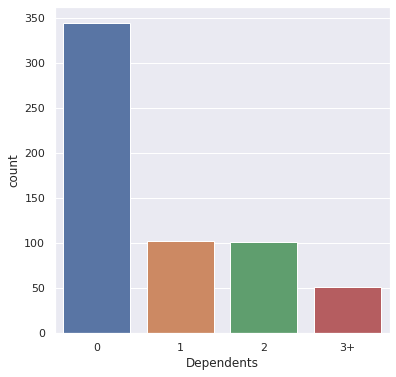

In [31]:

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Dependents', data = loan_train)
# plt.savefig('../images/dependents_counts_0.png')
plt.show()

In [32]:
# TODO : Display the 15 rows having null values in Dependents column
loan_train[loan_train['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,1,1,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,1,1,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,1,1,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,1,1,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,1,1,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,0,0,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,1,1,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,1,0,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,1,1,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,1,1,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


- Most of them are married. So we can fill the null values on Dependents column based on Married column

In [ ]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Gender')
# plt.savefig('../images/dependents_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Married')
# plt.savefig('../images/dependents_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Education')
# plt.savefig('../images/dependents_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/dependents_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/dependents_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/dependents_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/dependents_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/dependents_counts_8.png')
# plt.show()

#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
# samples_index_to_be_dropped = loan_train[loan_train['Dependents'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [33]:
# TODO : Function for filling null values on dependents columns
def dependents_null_value_filler(df):
    for row in range(df.shape[0]):
        if df.loc[row, 'Dependents'] is np.nan:
            df.loc[row, 'Dependents'] = str(df.loc[row, 'Married'])
    return df

In [34]:
# TODO : Fill null values on Dependents column
loan_train = dependents_null_value_filler(loan_train)

In [35]:
# TODO : Encoding Categorical data into NUmerical Data
loan_train['Dependents'] = loan_train['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

<br><br><br>

#### 5. Education

In [36]:
# TODO : Descriptive Statistics on EDucation columns
loan_train['Education'].describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

- Out of 614 applicants, 480 are Graduated.

In [37]:
# TODO : Number of nul values on Education column
loan_train['Education'].isnull().sum()

0

- There are no null values in Education column
- There are two unique values in Education column.
- We can encode Graduate as 1 and Not Graduate as 0

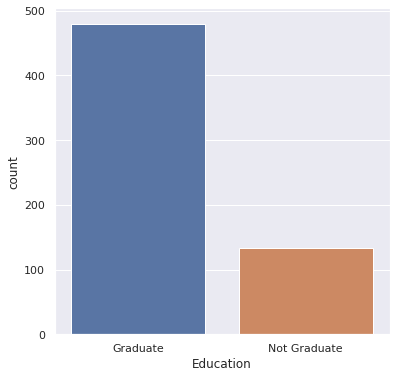

In [38]:

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Education', data = loan_train)
# plt.savefig('../images/education_counts_0.png')
plt.show()

In [ ]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Gender')
# plt.savefig('../images/education_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Married')
# plt.savefig('../images/education_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/education_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/education_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/education_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/education_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/education_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/education_counts_8.png')
# plt.show()

In [39]:
# TODO : Encoding categorical data into Numerical data
loan_train['Education'] = loan_train['Education'].apply(lambda x : {'Graduate' : 1, 'Not Graduate' : 0}[x])

<br><br><br>

#### 6. Self_Employed

In [40]:
# TODO : Descriptive Statistics on Self_Employed column
loan_train['Self_Employed'].describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

In [41]:
# TODO : Uniques and Values count on Self_Employed column
print("Number of null values : ", loan_train['Self_Employed'].isnull().sum())
print("Unique values : ", loan_train['Self_Employed'].unique())
print("Value counts : \n", loan_train['Self_Employed'].value_counts())

Number of null values :  32
Unique values :  ['No' 'Yes' nan]
Value counts : 
 No     500
Yes     82
Name: Self_Employed, dtype: int64


In [ ]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train)
# plt.savefig('../images/employed_counts_0.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Gender')
# plt.savefig('../images/employed_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Married')
# plt.savefig('../images/employed_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/employed_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Education')
# plt.savefig('../images/employed_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/employed_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/employed_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/employed_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/employed_counts_8.png')
# plt.show()

- Nearly 86% percentage of the applicant are not self employed.
- So we can fill the null values as Not Self employed.

#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
# samples_index_to_be_dropped = loan_train[loan_train['Self_Employed'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [42]:
# TODO : Filling Null values with No on Self_Employed column
loan_train['Self_Employed'].fillna(value = 'No', inplace = True)

# TODO : Encoding Self_Employed as 1 and Not Self_Employed as 0
loan_train['Self_Employed'] = loan_train['Self_Employed'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

<br><br><br>

#### 7. Applicant Income

In [43]:
# Let's get the knowledge about Applicant Income

# TODO : Descriptive Statistics on Applicant Income
loan_train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [44]:
# TODO : Check for null values on ApplicantIncome column
loan_train['ApplicantIncome'].isnull().sum()

0

###### Hence there is no null values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


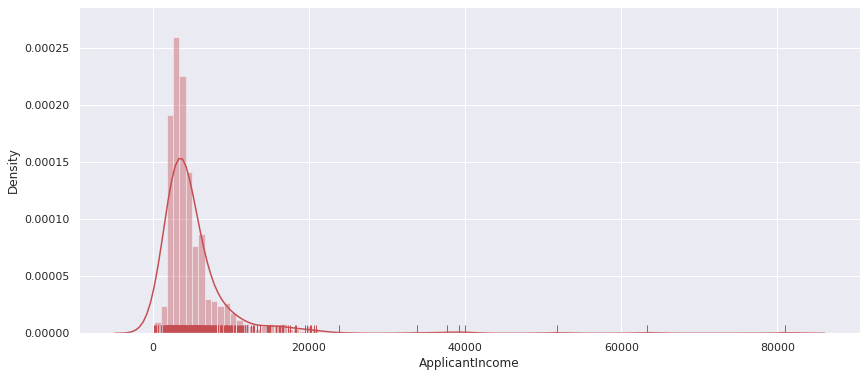

In [45]:
# TODO : Distribution of Applicant Income

plt.figure(figsize = (14, 6))
sb.distplot(loan_train['ApplicantIncome'], rug = True, bins = 100, color='r')
# plt.savefig('../images/ApplicantIncomeDistribution.png')

- From the above distplot, most of the Applicants income less than Rs.10,000 and some considerable amount of applicants having income between Rs.10,000 and Rs.20,000.

In [46]:
# TODO : Displaying the applicants having income more than 20,000
loan_train[loan_train['ApplicantIncome'] > 20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
126,LP001448,1,1,3,1,0,23803,0.0,370.0,360.0,1.0,Rural,Y
130,LP001469,1,0,0,1,1,20166,0.0,650.0,480.0,NaN,Urban,Y
155,LP001536,1,1,3,1,0,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,1,1,3,1,0,51763,0.0,700.0,300.0,1.0,Urban,Y
183,LP001637,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,1,1,0,1,1,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
284,LP001922,1,1,0,1,0,20667,0.0,NaN,360.0,1.0,Rural,N
308,LP001996,1,0,0,1,0,20233,0.0,480.0,360.0,1.0,Rural,N
333,LP002101,1,1,0,1,0,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,Rural,N


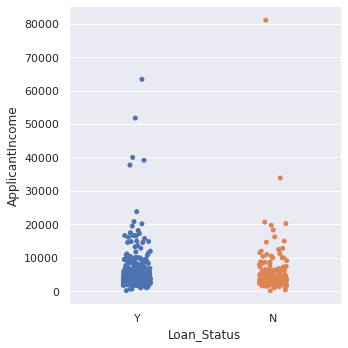

In [47]:
# TODO : Let's know the contribution of Applicant Income on determining Loan_Status 
sb.catplot(x = 'Loan_Status', y = 'ApplicantIncome', data = loan_train)

###### From the above categorical plot, Applicant's income failed to differentiate Loan_Status. For more accuracy, we may drop the Applicant Income column.

<br><br><br>

#### 8. Co-applicant Income

In [48]:
# TODO : Descriptive Statistics on Co-applicant's Income
loan_train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [49]:
# TODO : Check for null values on co-applicant income column
loan_train['CoapplicantIncome'].isnull().sum()

0

###### Hence there is no null values on Coapplicant Income column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


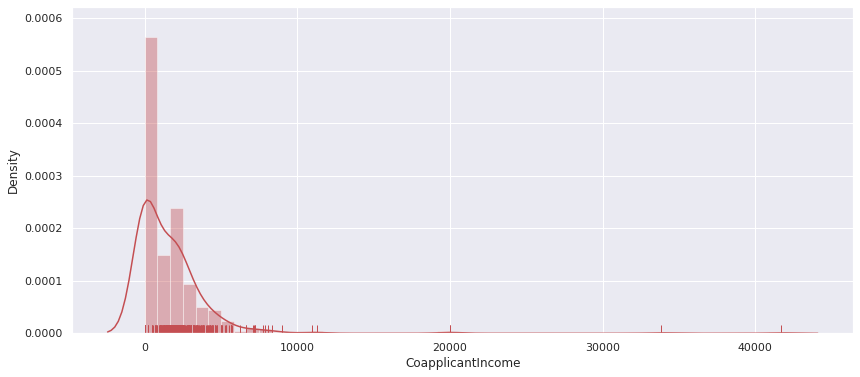

In [50]:
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['CoapplicantIncome'], rug = True, color = 'r')
# plt.savefig('../images/CoapplicantIncomeDistribution.png')

###### From the above plot most of the co-applicant income is zero or nearer to zero

In [51]:
# TODO : Let's get the different values counts on CoapplicantIncome column
loan_train['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

<br><br><br>

#### 9. LoanAmount

In [52]:
# TODO : Descriptive Statistics on LoanAmount
loan_train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


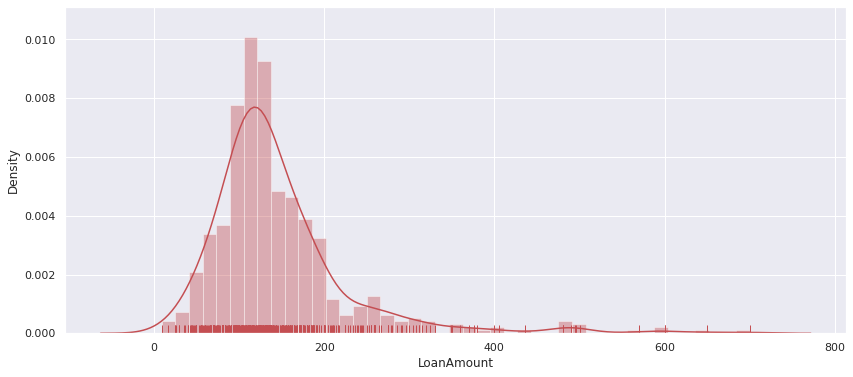

In [53]:
# TODO : Distribution of LoanAmount
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['LoanAmount'], rug = True, color = 'r')
# plt.savefig('../images/LoanAmountDistribution.png')

In [54]:
# TODO : Let's know the different LoanAmount
loan_train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [55]:
# TODO : Count of Null values on LoanAmount column
loan_train['LoanAmount'].isnull().sum()

22

##### There are 22 null values on LoanAmount column

In [56]:
# TODO : Display the Samples having null values on LoanAmount
loan_train[loan_train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,1,1,0,1,0,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,1,1,1,1,0,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,1,1,1,1,1,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,1,0,0,1,0,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,1,1,1,1,0,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,1,1,0,1,0,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,0,0,1,1,1,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,1,0,0,1,0,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,1,1,3,0,0,3992,0.0,NaN,180.0,1.0,Urban,N


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
# samples_index_to_be_dropped = loan_train[loan_train['LoanAmount'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [57]:
# TODO : To know if yes in LoanStatus, then what is the average LoanAmount 
#        and if no in LoanStatus, then what is the average LoanAmount by using GroupBy in LoanStatus

loan_train[~loan_train['LoanAmount'].isnull()].groupby('Loan_Status').describe().T.loc['LoanAmount']

Loan_Status,N,Y
count,181.000000,411.000000
mean,151.220994,144.294404
std,85.862783,85.484607
min,9.000000,17.000000
25%,100.000000,100.000000
50%,129.000000,126.000000
75%,176.000000,161.000000
max,570.000000,700.000000


##### For yes in Loan_Status, average LoanAmount is 151.22 and no in Loan_Status, average LoanAmount is 144.29.

In [58]:
# TODO : Filling Above values on LoanAmount column based on LoanStatus.
def LoanAmount_null_values_filler(df):
    for row in range(df.shape[0]):
        if pd.isnull(df.loc[row, 'LoanAmount']):
            if df.loc[row, 'Loan_Status'] == 'Y':
                df.loc[row, 'LoanAmount'] = 144.29
            elif df.loc[row, 'Loan_Status'] == 'N':
                df.loc[row, 'LoanAmount'] = 152.22
            else:
                pass
    return df

In [59]:
# TODO : Filling null values on LoanAmount
loan_train = LoanAmount_null_values_filler(loan_train)

<br><br><br>

#### 10. Loan_Amount_Term

In [60]:
# TODO : Descriptive Statistics on Loan_Amount_Term
loan_train['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [61]:
# TODO : Number of null values on Loan_Amount_Term
loan_train['Loan_Amount_Term'].isnull().sum()

14

In [62]:
# TODO : Unique Values count in Loan_Amount_Term column
loan_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

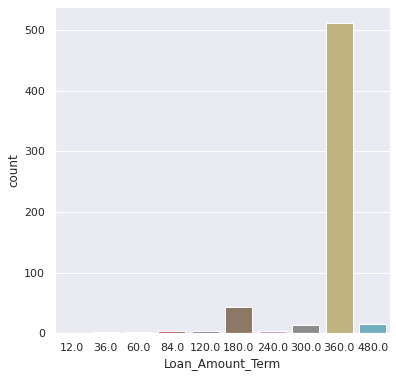

In [63]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Amount_Term', data = loan_train)
# plt.savefig('../images/term_counts.png')
plt.show()

##### Most of the applicants which is nearly 83 % of applicant chosen to Loan_Amount_Term of 360.

In [64]:
# TODO : Display the applicant samples having null values on Loan_Amount_Term
loan_train[pd.isnull(loan_train['Loan_Amount_Term'])]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,1,1,0,1,0,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,1,1,0,1,0,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,1,1,0,0,1,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,0,0,0,1,0,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,1,1,3,0,0,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,1,1,0,0,0,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,1,1,0,1,0,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,0,0,0,0,0,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,1,1,0,1,0,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,1,0,0,0,0,3189,2598.0,120.0,NaN,1.0,Rural,Y


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
# samples_index_to_be_dropped = loan_train[loan_train['Loan_Amount_Term'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [65]:
# TODO : To know if yes in LoanStatus, then what is the average Loan_Amount_Term
#        and if no in LoanStatus, then what is the average Loan_Amount_Term by using GroupBy in LoanStatus

loan_train[~loan_train['Loan_Amount_Term'].isnull()].groupby('Loan_Status').describe().T.loc['Loan_Amount_Term']

Loan_Status,N,Y
count,186.000000,414.000000
mean,344.064516,341.072464
std,69.238921,63.247770
min,36.000000,12.000000
25%,360.000000,360.000000
50%,360.000000,360.000000
75%,360.000000,360.000000
max,480.000000,480.000000


##### For both status of Loan_Status, the average Loan_Amount_Term is approximately. Let's fill them with the value of 360.

In [66]:
# TODO : Fill null values on Loan_Amount_Term
loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(value = 360)

<br><br><br>

##### 11. Credit_History

In [67]:
# TODO : Descriptive Statistics on Credit_History
loan_train['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [68]:
# TODO : Number of null values on Credit_History
loan_train['Credit_History'].isnull().sum()

50

In [69]:
# TODO : Unique values count on Credit_History
loan_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train)
# plt.savefig('../images/credit_counts_0.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Gender')
# plt.savefig('../images/credit_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Married')
# plt.savefig('../images/credit_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/credit_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Education')
# plt.savefig('../images/credit_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/credit_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/credit_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/credit_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/credit_counts_8.png')
# plt.show()

In [70]:
# TODO : Samples having null values on Credit_History
loan_train[loan_train['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,1,0,1,0,0,3596,0.0,100.00,240.0,NaN,Urban,Y
24,LP001052,1,1,1,1,0,3717,2925.0,151.00,360.0,NaN,Semiurban,N
30,LP001091,1,1,1,1,0,4166,3369.0,201.00,360.0,NaN,Urban,N
42,LP001123,1,1,0,1,0,2400,0.0,75.00,360.0,NaN,Urban,Y
79,LP001264,1,1,3,0,1,3333,2166.0,130.00,360.0,NaN,Semiurban,Y
83,LP001273,1,1,0,1,0,6000,2250.0,265.00,360.0,NaN,Semiurban,N
86,LP001280,1,1,2,0,0,3333,2000.0,99.00,360.0,NaN,Semiurban,Y
95,LP001326,1,0,0,1,0,6782,0.0,152.22,360.0,NaN,Urban,N
117,LP001405,1,1,1,1,0,2214,1398.0,85.00,360.0,NaN,Urban,Y
125,LP001443,0,0,0,1,0,3692,0.0,93.00,360.0,NaN,Rural,Y


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
# samples_index_to_be_dropped = loan_train[loan_train['Credit_History'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [71]:
# TODO : To know if yes in LoanStatus, then what is the average Credit_History
#        and if no in LoanStatus, then what is the average Credit_History by using GroupBy in LoanStatus

loan_train[~loan_train['Credit_History'].isnull()].groupby('Loan_Status').describe().T.loc['Credit_History']

Loan_Status,N,Y
count,179.000000,385.000000
mean,0.541899,0.981818
std,0.499639,0.133782
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


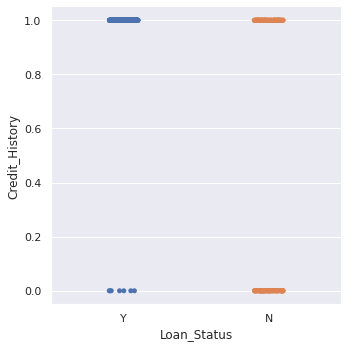

In [72]:
# TODO : To know the contribution of Credit_History on Loan_Status
sb.catplot(x = 'Loan_Status', y = 'Credit_History', data = loan_train)

From the above plot, the point we got is
- If the applicant is having Credit_History, then there is a difficulty on classifying.
- But if the applicant is not having Credit_History, then there is a high probability chance of rejection.

##### Since 78 % applicants having the Credit_History, we can fill the null values with 1.0

In [73]:
# TODO : Filling null values on Credit_History
loan_train['Credit_History'] = loan_train['Credit_History'].fillna(value = 1.0)

<br><br><br>

#### 12. Property_Area

In [74]:
# TODO : Descriptive Statistics on Property_Area
loan_train['Property_Area'].describe()

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

In [75]:
# TODO : Number of null values on Property_Area
loan_train['Property_Area'].isnull().sum()

0

In [76]:
# TODO : Unique values count in Property_Area column
loan_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train)
# plt.savefig('../images/property_counts_0.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Gender')
# plt.savefig('../images/property_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Married')
# plt.savefig('../images/property_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/property_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Education')
# plt.savefig('../images/property_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/property_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/property_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/property_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/property_counts_8.png')
# plt.show()

##### Since the Property_Area column having approximately same repetitions on Property_Area columns. we can go with pandas get_dummies for creating separate column for each property area

In [77]:
# TODO : To get Property_Area Dummies
Property_Area_Dummies = pd.get_dummies(loan_train['Property_Area'])
Property_Area_Dummies

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [78]:
# TODO : Create Separate column for Rural and Urban Property_Area
loan_train['Property_Area_Rural'] = Property_Area_Dummies['Rural']
loan_train['Property_Area_Semiurban'] = Property_Area_Dummies['Semiurban']

In [79]:
# TODO : Dropping Property_Area column as it is replaced with dummy columns
loan_train.drop('Property_Area', axis = 1, inplace = True)

In [80]:
loan_train.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
dtype: int64

#### Finally we replaced all the null values with suitable values.

In [81]:
loan_train.dtypes

Loan_ID                     object
Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
dtype: object

#### Finally we encoded all the categorical columns as numerical columns optimally except Loan_ID and Loan_Status

In [82]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
0,LP001002,1,0,0,1,0,5849,0.0,144.29,360.0,1.0,Y,0,0
1,LP001003,1,1,1,1,0,4583,1508.0,128.00,360.0,1.0,N,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.00,360.0,1.0,Y,0,0
3,LP001006,1,1,0,0,0,2583,2358.0,120.00,360.0,1.0,Y,0,0
4,LP001008,1,0,0,1,0,6000,0.0,141.00,360.0,1.0,Y,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.00,360.0,1.0,Y,1,0
610,LP002979,1,1,3,1,0,4106,0.0,40.00,180.0,1.0,Y,1,0
611,LP002983,1,1,1,1,0,8072,240.0,253.00,360.0,1.0,Y,0,0
612,LP002984,1,1,2,1,0,7583,0.0,187.00,360.0,1.0,Y,0,0


<br><br><br><br><br><br>

## Feature Selection

In [83]:
# TODO : Display columns in Train Data
print(" Columns in the Train Data : \n", loan_train.columns)

 Columns in the Train Data : 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban'],
      dtype='object')


##### From the above discussion, we can remove some of the columns from the training data.

##### Those columns are Loan_ID

##### Let's drop the unwanted columns from train data

In [84]:
# TODO : Dropping Loan_ID column from the Train data
loan_train.drop('Loan_ID', axis = 1, inplace = True)

# Detecting Outliers

In [85]:
loan_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban'],
      dtype='object')

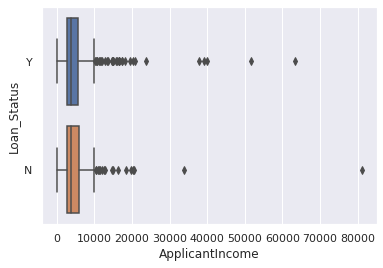

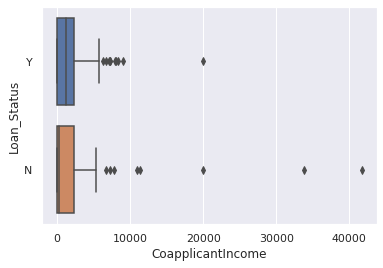

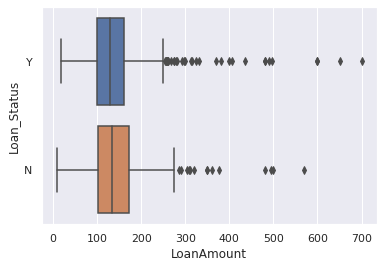

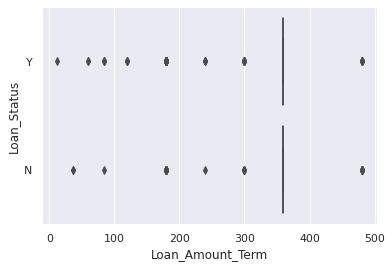

In [86]:
numerical_continuous_data_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for column in numerical_continuous_data_column:
    sb.boxplot(x = column, y = 'Loan_Status', data = loan_train)
    plt.show()

In [87]:
# TODO : Display samples having outliers on ApplicantIncome
loan_train[loan_train['ApplicantIncome'] > 25000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
155,1,1,3,1,0,39999,0.0,600.0,180.0,0.0,Y,0,1
171,1,1,3,1,0,51763,0.0,700.0,300.0,1.0,Y,0,0
183,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,N,0,1
185,1,1,0,1,1,39147,4750.0,120.0,360.0,1.0,Y,0,1
333,1,1,0,1,0,63337,0.0,490.0,180.0,1.0,Y,0,0
409,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,N,1,0
443,1,0,1,1,0,37719,0.0,152.0,360.0,1.0,Y,0,1


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
# samples_index_to_be_dropped = loan_train[loan_train['ApplicantIncome'] > 25000]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [88]:
# TODO : Display samples having outliers on coApplicantIncome
loan_train[loan_train['CoapplicantIncome'] > 15000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
402,1,0,0,1,0,2500,20000.0,103.0,360.0,1.0,Y,0,1
417,1,1,2,1,1,1600,20000.0,239.0,360.0,1.0,N,0,0
581,1,0,0,1,0,1836,33837.0,90.0,360.0,1.0,N,0,0
600,0,0,3,1,0,416,41667.0,350.0,180.0,1.0,N,0,0


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
# samples_index_to_be_dropped = loan_train[loan_train['CoapplicantIncome'] > 25000]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [89]:
# TODO : Display Samples having outliers on LoanAmount
loan_train[loan_train['LoanAmount'] > 400]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
130,1,0,0,1,1,20166,0.0,650.0,480.0,1.0,Y,0,0
155,1,1,3,1,0,39999,0.0,600.0,180.0,0.0,Y,0,1
171,1,1,3,1,0,51763,0.0,700.0,300.0,1.0,Y,0,0
177,1,1,3,1,0,5516,11300.0,495.0,360.0,0.0,N,0,1
278,1,1,0,1,0,14583,0.0,436.0,360.0,1.0,Y,0,1
308,1,0,0,1,0,20233,0.0,480.0,360.0,1.0,N,1,0
333,1,1,0,1,0,63337,0.0,490.0,180.0,1.0,Y,0,0
369,1,1,0,1,0,19730,5266.0,570.0,360.0,1.0,N,1,0
432,1,0,0,1,0,12876,0.0,405.0,360.0,1.0,Y,0,1
487,1,1,1,1,0,18333,0.0,500.0,360.0,1.0,N,0,0


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
# samples_index_to_be_dropped = loan_train[loan_train['LoanAmount'] > 400]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

<br><br><br><br><br><br><br>

# Feature Observation

In [90]:
# TODO : Rearranging Train Data columns in order to bring Loan_Status to the last of the DataFrame
loan_train = loan_train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 10]]

In [91]:
# TODO : Let's do the feature correlation
loan_train_corr = loan_train.corr()
loan_train_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban
Gender,1.000000,0.364569,0.177917,-0.045364,-0.000525,0.058809,0.082912,0.108218,-0.074030,0.009170,0.080283,-0.108623
Married,0.364569,1.000000,0.348717,-0.012304,0.004489,0.051708,0.075948,0.147020,-0.100912,0.010938,-0.006805,0.005845
Dependents,0.177917,0.348717,1.000000,-0.062281,0.059584,0.119616,0.029628,0.162892,-0.099456,-0.046815,-0.005126,0.004692
Education,-0.045364,-0.012304,-0.062281,1.000000,0.010383,0.140760,0.062290,0.166241,0.073928,0.073658,-0.077520,0.039410
Self_Employed,-0.000525,0.004489,0.059584,0.010383,1.000000,0.127180,-0.016100,0.115035,-0.033739,-0.001550,0.022065,0.008710
ApplicantIncome,0.058809,0.051708,0.119616,0.140760,0.127180,1.000000,-0.116605,0.565608,-0.046531,-0.018615,0.015829,-0.014246
CoapplicantIncome,0.082912,0.075948,0.029628,0.062290,-0.016100,-0.116605,1.000000,0.187618,-0.059383,0.011134,0.005329,-0.027044
LoanAmount,0.108218,0.147020,0.162892,0.166241,0.115035,0.565608,0.187618,1.000000,0.036135,-0.002387,0.043143,-0.008994
Loan_Amount_Term,-0.074030,-0.100912,-0.099456,0.073928,-0.033739,-0.046531,-0.059383,0.036135,1.000000,-0.004705,0.034321,0.059141
Credit_History,0.009170,0.010938,-0.046815,0.073658,-0.001550,-0.018615,0.011134,-0.002387,-0.004705,1.000000,-0.020906,0.035976


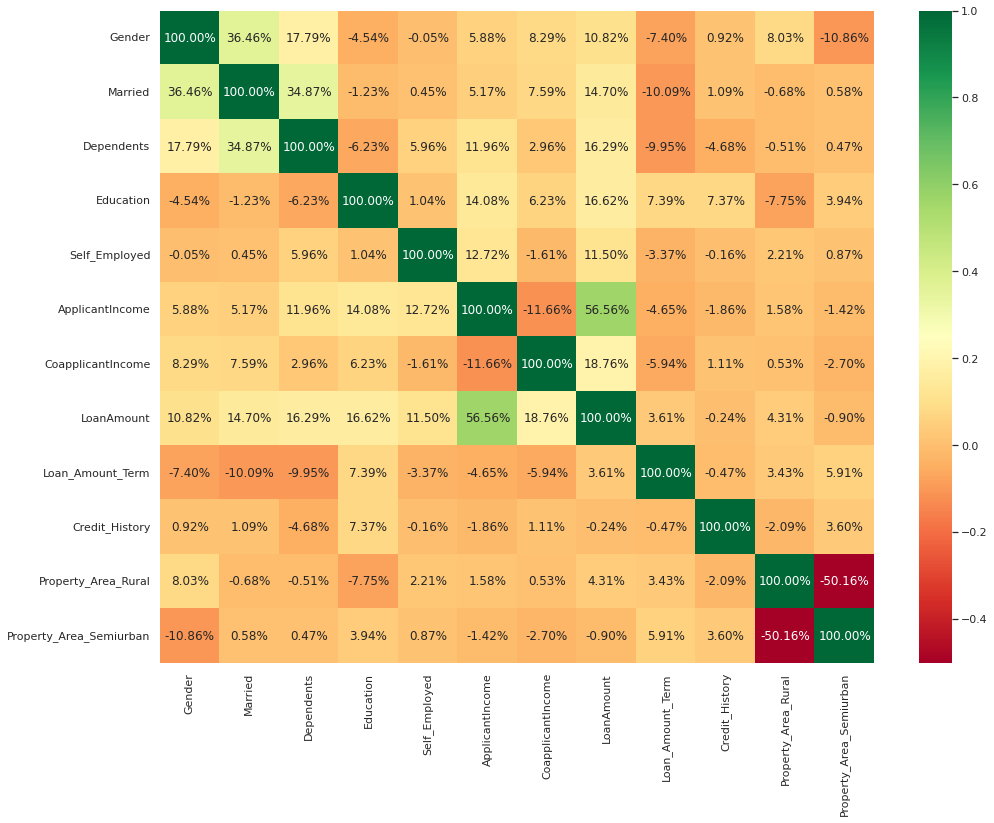

In [92]:
# TODO : Visualizing correlation of features
plt.figure(figsize = (16, 12))
sb.heatmap(loan_train_corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')
#plt.savefig('/correlation_of_features.png')

In [93]:
# TODO : To know whether the dataset is Balanced or Imbalanced
loan_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#### We have to make the Training Data some more balanced

#### To make the data to be balanced, we are going to duplicate the samples having Loan_Status as NO

In [94]:
# TODO : Correlation of Features
corr_with_loan_status = loan_train.corrwith(loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))
corr_with_loan_status

Gender                     0.017987
Married                    0.091478
Dependents                 0.008204
Education                  0.085884
Self_Employed             -0.003700
ApplicantIncome           -0.004710
CoapplicantIncome         -0.059187
LoanAmount                -0.038557
Loan_Amount_Term          -0.022549
Credit_History             0.540556
Property_Area_Rural       -0.100694
Property_Area_Semiurban    0.136540
dtype: float64

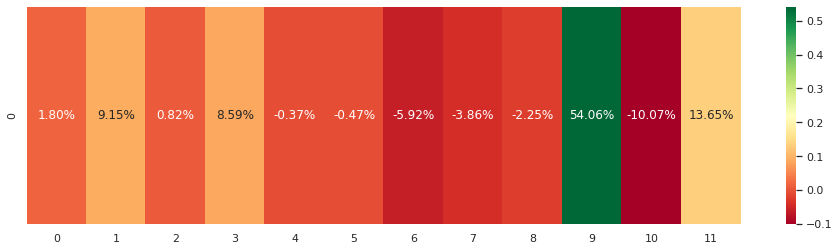

In [95]:
# Feature correlation with loan status
plt.figure(figsize = (16, 4))
sb.heatmap([corr_with_loan_status], cmap = 'RdYlGn', annot = True, fmt = '.2%')
#plt.savefig('/correlation_of_features_with_loan_status.png')

##### Credit_History is having more correlation with Loan_Status

<Figure size 864x432 with 0 Axes>

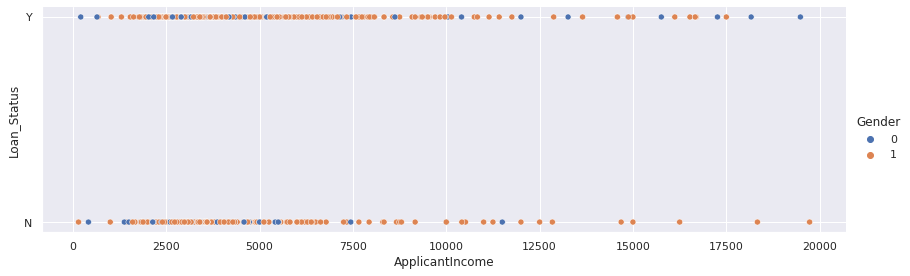

In [96]:
# TODO : Relation between Gender, Applicant Income and Loan Status
plt.figure(figsize = (12, 6))
sb.relplot(x = 'ApplicantIncome', y = 'Loan_Status', 
           data = loan_train[loan_train['ApplicantIncome'] <= 20000],
           hue = 'Gender', aspect = 3, height = 4)

##### Looks Same for both the cases

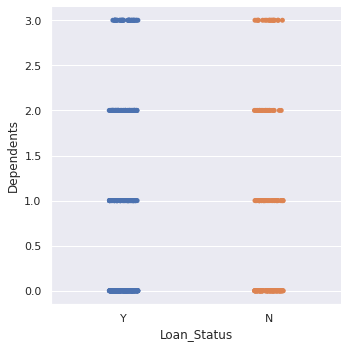

In [97]:
# Relation Between Dependents and Loan Status
sb.catplot(x = 'Loan_Status', y = 'Dependents', data = loan_train)

##### Looks same for both the cases

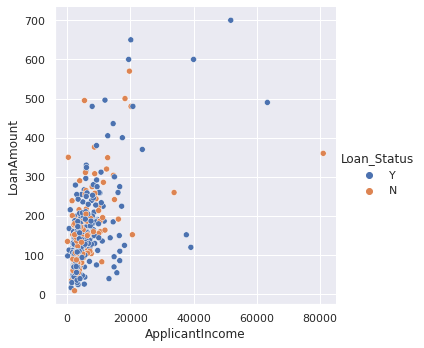

In [98]:
# Relation Between ApplicantIncome and LoanAmount with hue as Loan_Status
sb.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train, hue = 'Loan_Status')

##### There is a relation between LoanAmount and Applicant Income but not classifying Loan_Status

In [99]:
# TODO : To know the feature Importances
y = loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]).values
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(loan_train.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to Loan_Status : ")
pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1])

Percentage Importance of each features with respect to Loan_Status : 


Gender                      2.155510
Married                     2.219575
Dependents                  5.820050
Education                   2.168669
Self_Employed               2.318181
ApplicantIncome            18.619314
CoapplicantIncome          11.875073
LoanAmount                 18.846139
Loan_Amount_Term            4.774731
Credit_History             27.364292
Property_Area_Rural         1.777680
Property_Area_Semiurban     2.060785
dtype: float64

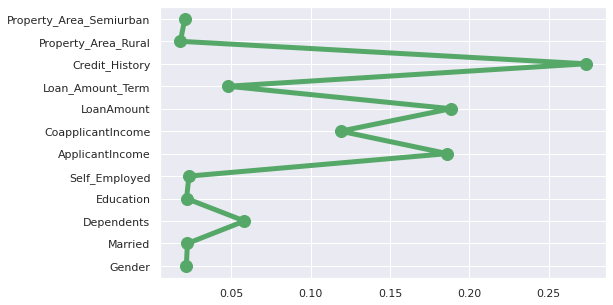

In [100]:
plt.figure(figsize=(8, 5))
plt.plot(etc.feature_importances_, loan_train.columns[:-1], 'g-o', linewidth=5, markersize=12)
#plt.savefig("../images/feature_importances.png")

###### From the above plot, Credit_History (28 %) has the more importance, and then Loan Amount and Applicant Income and then Co-applicant Income

#### Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status

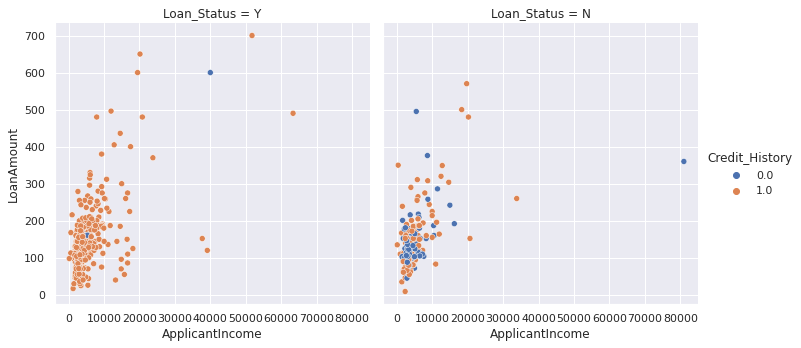

In [101]:
# TODO : Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status
sb.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')

From the above plot,
- The applicants those who are all having the credit history mostly getting the Loan Amount
- From this, Credit_History is the major feature.

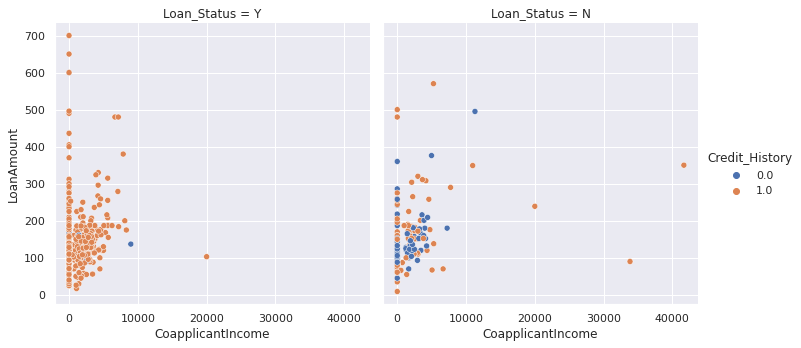

In [102]:
# TODO : Relation Between Credit_History, Loan_Amount and Coapplicant_Income with Loan_Status
sb.relplot(x = 'CoapplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')

#### Most of the Co-applicants are not having income

<br><br><br>

## Feature Selection

In [103]:
# TODO : Arranging features based on their importance to the Loan_Status
prediction_features = pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1]).sort_values(ascending = False)

In [104]:
# TODO : Extracting Features name
prediction_features = prediction_features.index

In [105]:
prediction_features = prediction_features[:5]
prediction_features

Index(['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome',
       'Dependents'],
      dtype='object')

<br><br><br><br>

# Model Building

In [106]:
feature_columns = loan_train[prediction_features]
prediction_column = loan_train['Loan_Status']

In [107]:
X = feature_columns.values
y = prediction_column.values


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 5), (123, 5), (491,), (123,))

<br><br><br><br><br><br>

# Logistic Regresion with Model Performance

<br><br>

## Simple Logistic Regression

In [110]:
logictic_model = LogisticRegression(max_iter = 1000)
logictic_model.fit(X_train, y_train)

print("Training Accuracy : {}%".format(logictic_model.score(X_train, y_train) * 100))
print("Testing Accuracy  : {}%".format(logictic_model.score(X_test, y_test) * 100))

Training Accuracy : 79.63340122199592%
Testing Accuracy  : 85.36585365853658%


#### Thus our Logistic Regression model is having 80% Training Accuracy and 86% Testing Accuracy

In [111]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)


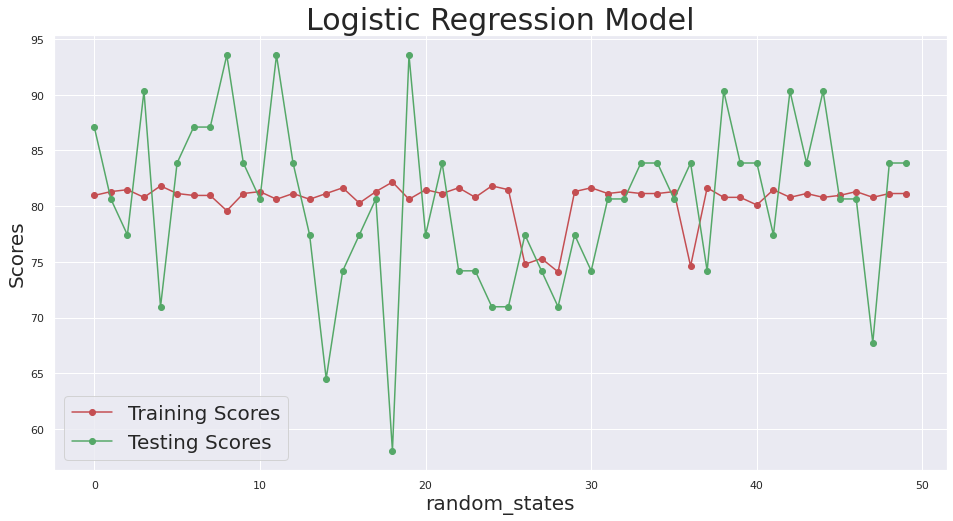

In [112]:
plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
#plt.savefig('../images/logistic_model_performance.png')
plt.show()

In [115]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

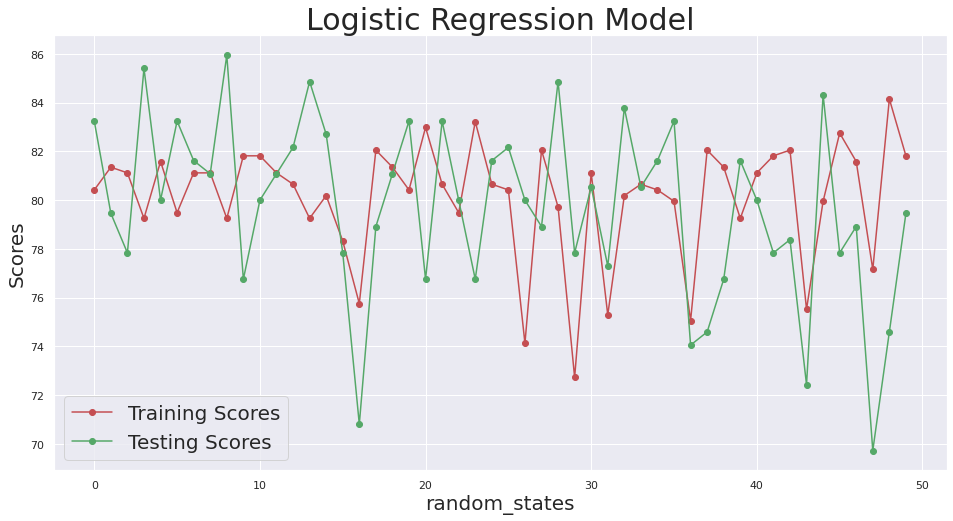

In [116]:
plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
#plt.savefig('../images/logistic_model_performance.png')
plt.show()

In [117]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(train_scores, test_scores, abs(np.array(train_scores) - np.array(test_scores))):
    print(scores)

(80.41958041958041, 83.24324324324324, 2.823662823662829)
(81.35198135198135, 79.45945945945945, 1.8925218925218985)
(81.11888111888112, 77.83783783783784, 3.2810432810432815)
(79.25407925407926, 85.4054054054054, 6.1513261513261455)
(81.58508158508158, 80.0, 1.585081585081582)
(79.48717948717949, 83.24324324324324, 3.756063756063753)
(81.11888111888112, 81.62162162162161, 0.5027405027404939)
(81.11888111888112, 81.08108108108108, 0.03780003780003938)
(79.25407925407926, 85.94594594594595, 6.691866691866693)
(81.81818181818183, 76.75675675675676, 5.061425061425069)
(81.81818181818183, 80.0, 1.8181818181818272)
(81.11888111888112, 81.08108108108108, 0.03780003780003938)
(80.65268065268066, 82.16216216216216, 1.5094815094815033)
(79.25407925407926, 84.86486486486487, 5.610785610785612)
(80.1864801864802, 82.70270270270271, 2.5162225162225127)
(78.32167832167832, 77.83783783783784, 0.4838404838404813)
(75.75757575757575, 70.8108108108108, 4.946764946764944)
(82.05128205128204, 78.91891891

#### See how training accuracy and testing accuracy changing for different training Samples

<br><br><br><br>

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

<br><br><br><br>

## Logistic Regression with Standard Scaling and PCA

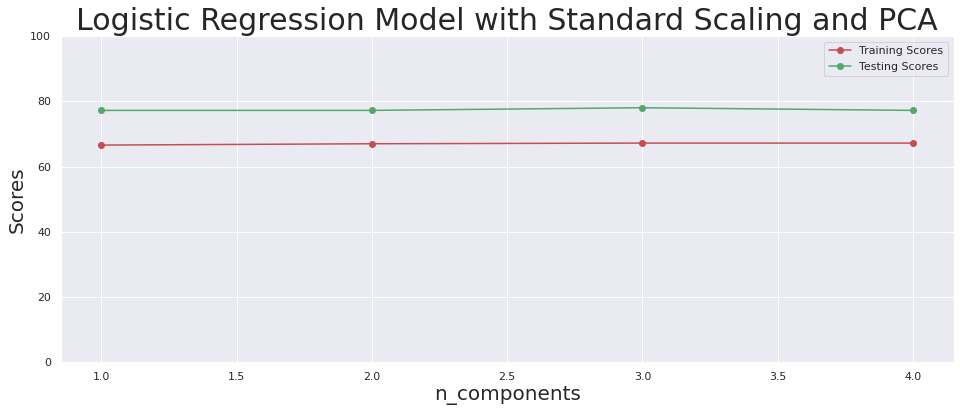

In [119]:
training_scores = []
testing_scores = []
n_components = list(range(1, 5))
for n_component in n_components:
#     # Converting Train Data to Same Scale
#     standard_scaler = StandardScaler()
#     # Scaling training samples
#     scaled_X_train = standard_scaler.fit_transform(X_train)
#     # Scaling testing samples
#     scaled_X_test = standard_scaler.transform(X_test)
    
    # PCA Implementation
    pca = PCA(n_components = n_component)
    pca_X_train = pca.fit_transform(X_train)
    pca_X_test = pca.transform(X_test)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(pca_X_train, y_train)
    training_scores.append(logictic_model.score(pca_X_train, y_train) * 100)
    testing_scores.append(logictic_model.score(pca_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(n_components, training_scores, 'ro-')
plt.plot(n_components, testing_scores, 'go-')
plt.xlabel('n_components', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model with Standard Scaling and PCA', fontsize = 30)
plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

<br><br><br><br><br><br>

# Decision Tree Classifier with Model Performance

<br><br>

## Simple Decision Tree Classifier

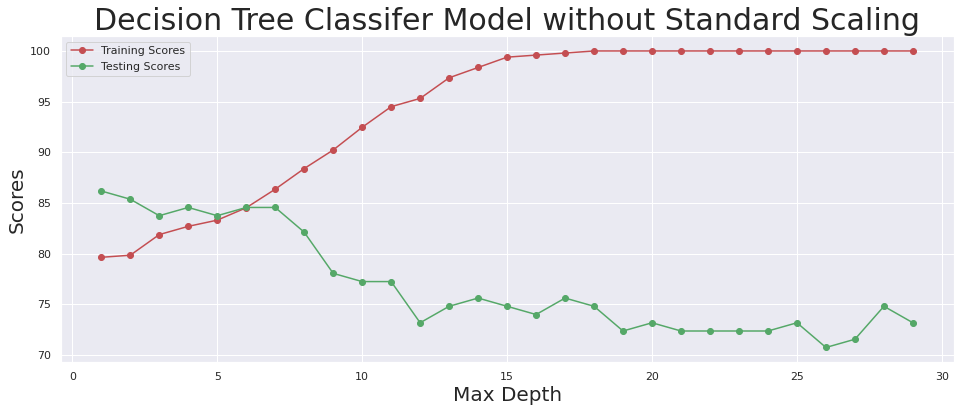

In [253]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier( max_depth = max_depth)
    decision_tree_classifier.fit(X_train, y_train)
    training_scores.append(decision_tree_classifier.score(X_train, y_train) * 100)
    testing_scores.append(decision_tree_classifier.score(X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depth', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifer Model without Standard Scaling', fontsize = 30)
# plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
#plt.savefig('../images/decision_tree_classifier_model_performance.png')
plt.show()

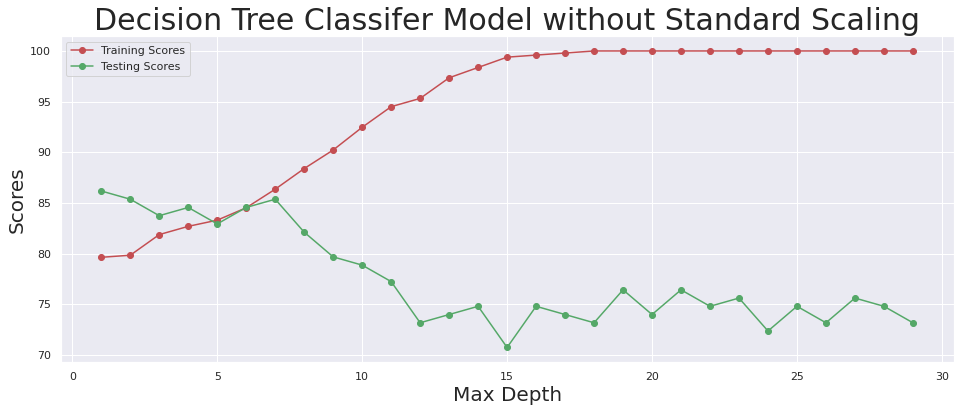

In [254]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier( max_depth = max_depth)
    decision_tree_classifier.fit(X_train, y_train)
    training_scores.append(decision_tree_classifier.score(X_train, y_train) * 100)
    testing_scores.append(decision_tree_classifier.score(X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depth', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifer Model without Standard Scaling', fontsize = 30)
# plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
#plt.savefig('../images/decision_tree_classifier_model_performance.png')
plt.show()

In [255]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(training_scores, testing_scores, abs(np.array(training_scores) - np.array(testing_scores))):
    print(scores)

(79.63340122199592, 86.1788617886179, 6.545460566621969)
(79.83706720977597, 85.36585365853658, 5.528786448760613)
(81.87372708757637, 83.73983739837398, 1.866110310797609)
(82.68839103869654, 84.5528455284553, 1.8644544897587565)
(83.29938900203666, 82.92682926829268, 0.37255973374398366)
(84.5213849287169, 84.5528455284553, 0.03146059973839499)
(86.35437881873727, 85.36585365853658, 0.9885251602006946)
(88.39103869653768, 82.11382113821138, 6.277217558326299)
(90.22403258655804, 79.67479674796748, 10.549235838590562)
(92.4643584521385, 78.86178861788618, 13.602569834252321)
(94.5010183299389, 77.23577235772358, 17.265245972215325)
(95.31568228105907, 73.17073170731707, 22.144950573741994)
(97.35234215885947, 73.98373983739837, 23.368602321461097)
(98.37067209775967, 74.79674796747967, 23.57392413027999)
(99.38900203665987, 70.73170731707317, 28.6572947195867)
(99.59266802443992, 74.79674796747967, 24.79592005696024)
(99.79633401221996, 73.98373983739837, 25.812594174821584)
(100.0, 7

#### For Decision Tree Classifier model, we are going to choose max_depth as 8 from the above plot.

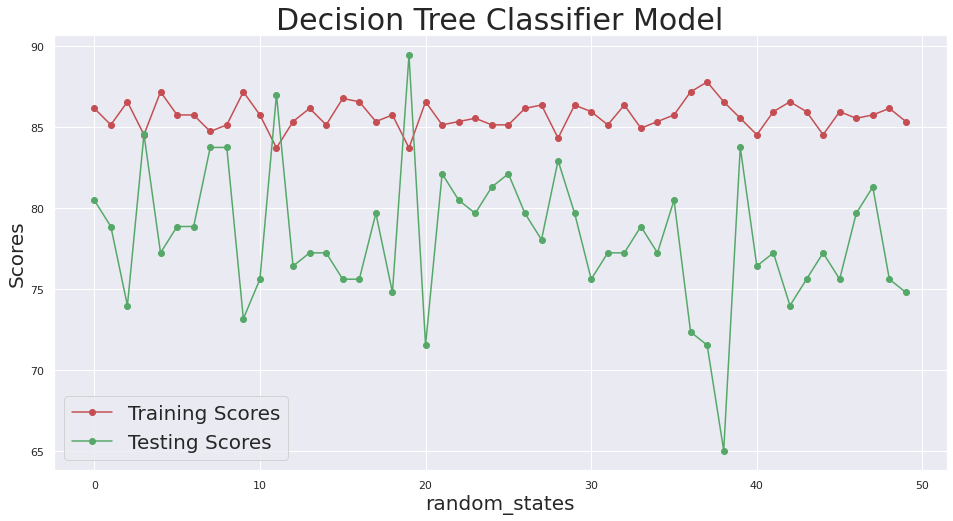

In [256]:
train_scores = []
test_scores = []
decision_tree_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    
    decision_tree_model = DecisionTreeClassifier(max_depth = 6)
    decision_tree_model.fit(X_train, y_train)
    
    train_score = decision_tree_model.score(X_train, y_train) * 100
    test_score = decision_tree_model.score(X_test, y_test) * 100
    
    decision_tree_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifier Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
#plt.savefig('../images/decision_tree_model_performance.png')
plt.show()

<br><br><br><br>

## Decision Tree Classifier with Standard Scaling

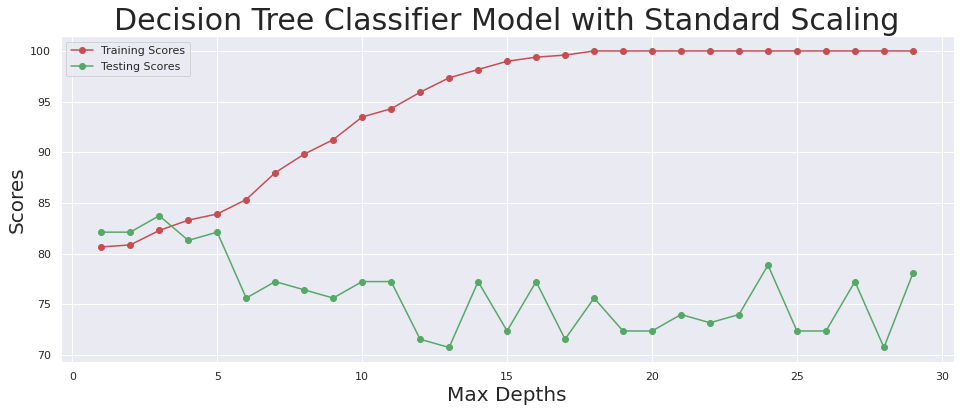

In [263]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    # Converting Train Data to Same Scale
    standard_scaler = StandardScaler()
    
    scaled_X_train = standard_scaler.fit_transform(X_train)
    scaled_X_test = standard_scaler.transform(X_test)
    
    decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_model.fit(scaled_X_train, y_train)
    training_scores.append(decision_tree_model.score(scaled_X_train, y_train) * 100)
    testing_scores.append(decision_tree_model.score(scaled_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depths', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifier Model with Standard Scaling', fontsize = 30)
# plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

#### For Decision Tree Classifier model, we are going to choose max_depth as 8 from the above plot.

In [264]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(training_scores, testing_scores):
    print(scores)

(80.65173116089613, 82.11382113821138)
(80.85539714867616, 82.11382113821138)
(82.28105906313645, 83.73983739837398)
(83.29938900203666, 81.30081300813008)
(83.91038696537679, 82.11382113821138)
(85.33604887983707, 75.60975609756098)
(87.9837067209776, 77.23577235772358)
(89.81670061099797, 76.42276422764228)
(91.24236252545825, 75.60975609756098)
(93.48268839103869, 77.23577235772358)
(94.29735234215886, 77.23577235772358)
(95.9266802443992, 71.54471544715447)
(97.35234215885947, 70.73170731707317)
(98.16700610997964, 77.23577235772358)
(98.98167006109979, 72.35772357723577)
(99.38900203665987, 77.23577235772358)
(99.59266802443992, 71.54471544715447)
(100.0, 75.60975609756098)
(100.0, 72.35772357723577)
(100.0, 72.35772357723577)
(100.0, 73.98373983739837)
(100.0, 73.17073170731707)
(100.0, 73.98373983739837)
(100.0, 78.86178861788618)
(100.0, 72.35772357723577)
(100.0, 72.35772357723577)
(100.0, 77.23577235772358)
(100.0, 70.73170731707317)
(100.0, 78.04878048780488)


#### For max_depth = 8, we get a Training Accuracy of 85.74% and a Testing Accuracy of 85.36%

<br><br><br><br>

## Decision Tree Classifier with Standard Scaling and PCA

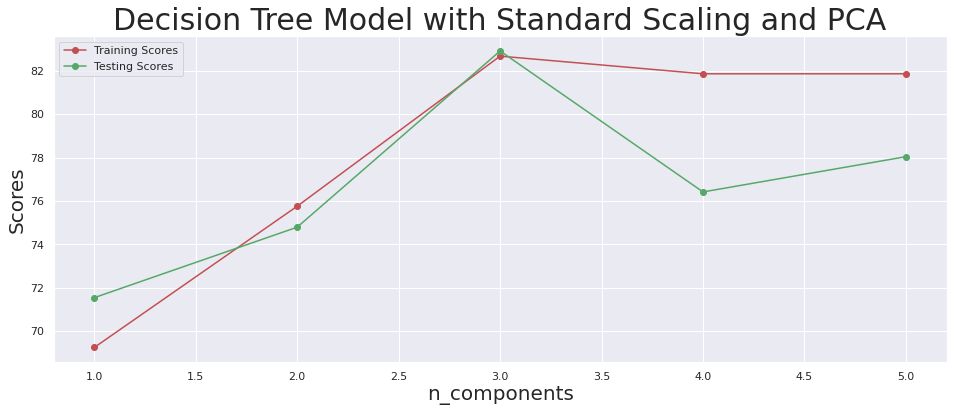

Max_Depth :  3
(69.24643584521385, 71.54471544715447)
(75.76374745417516, 74.79674796747967)
(82.68839103869654, 82.92682926829268)
(81.87372708757637, 76.42276422764228)
(81.87372708757637, 78.04878048780488)


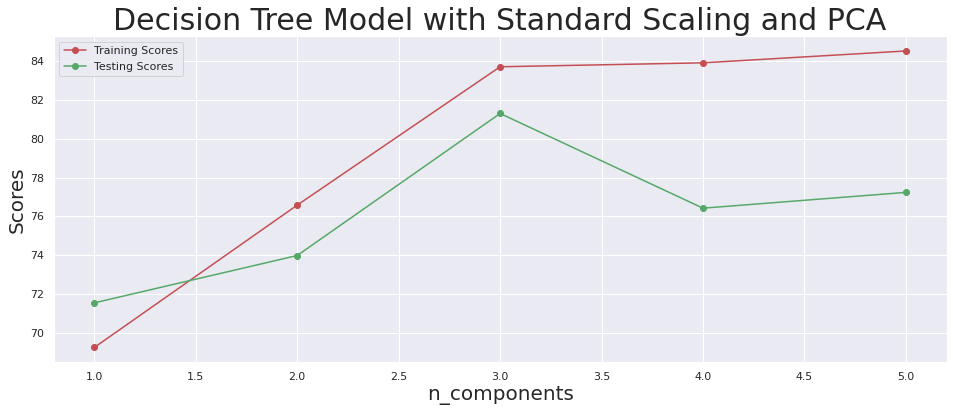

Max_Depth :  4
(69.24643584521385, 71.54471544715447)
(76.57841140529531, 73.98373983739837)
(83.70672097759673, 81.30081300813008)
(83.91038696537679, 76.42276422764228)
(84.5213849287169, 77.23577235772358)


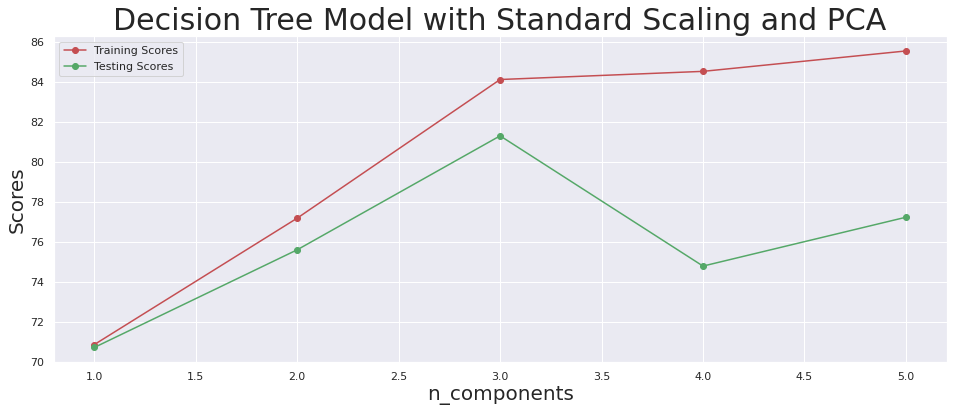

Max_Depth :  5
(70.87576374745417, 70.73170731707317)
(77.18940936863544, 75.60975609756098)
(84.11405295315683, 81.30081300813008)
(84.5213849287169, 74.79674796747967)
(85.5397148676171, 77.23577235772358)


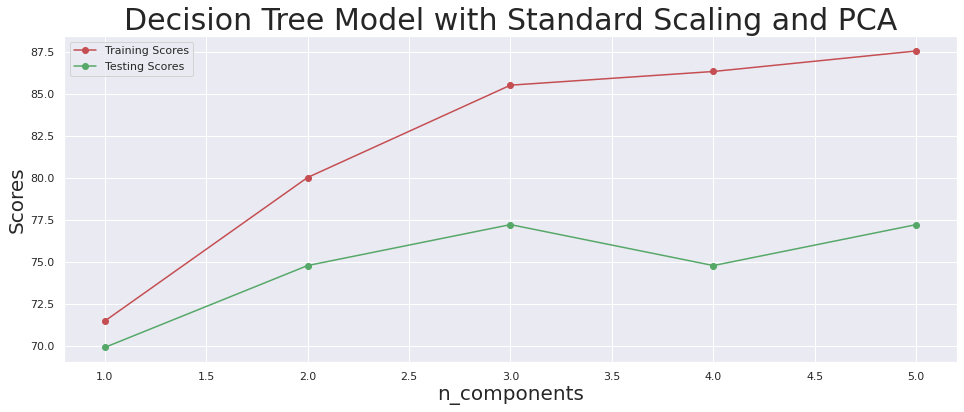

Max_Depth :  6
(71.4867617107943, 69.91869918699187)
(80.04073319755601, 74.79674796747967)
(85.5397148676171, 77.23577235772358)
(86.35437881873727, 74.79674796747967)
(87.57637474541752, 77.23577235772358)


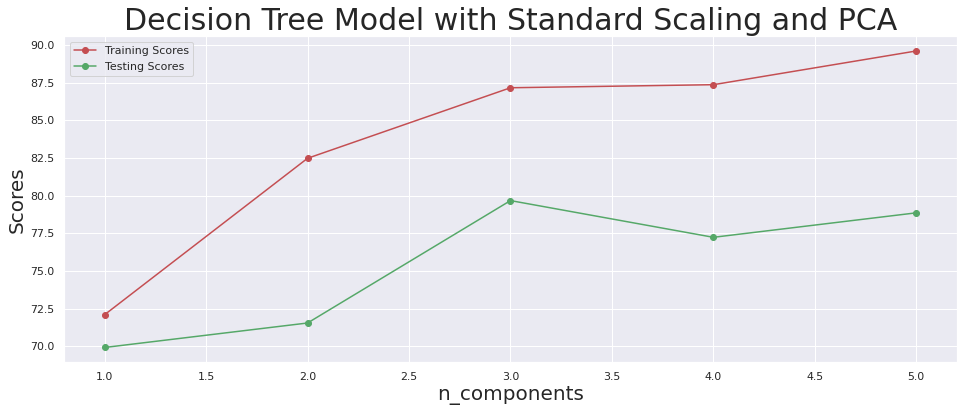

Max_Depth :  7
(72.09775967413442, 69.91869918699187)
(82.4847250509165, 71.54471544715447)
(87.16904276985743, 79.67479674796748)
(87.37270875763747, 77.23577235772358)
(89.61303462321793, 78.86178861788618)


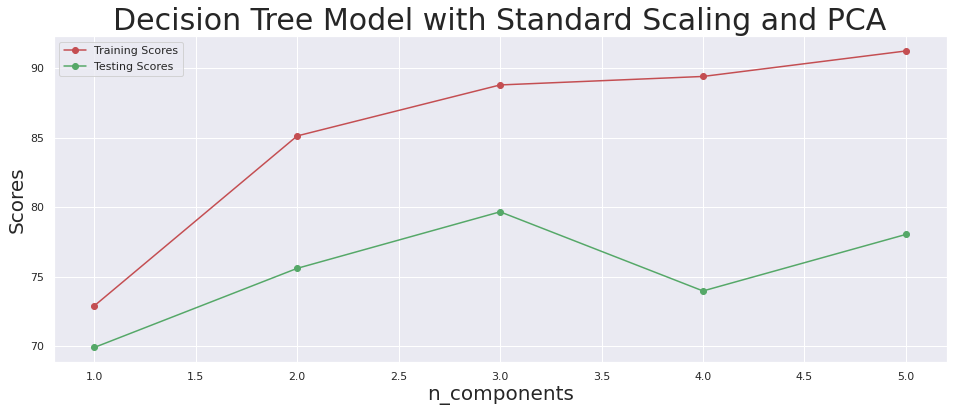

Max_Depth :  8
(72.91242362525459, 69.91869918699187)
(85.13238289205702, 75.60975609756098)
(88.79837067209776, 79.67479674796748)
(89.40936863543789, 73.98373983739837)
(91.24236252545825, 78.04878048780488)


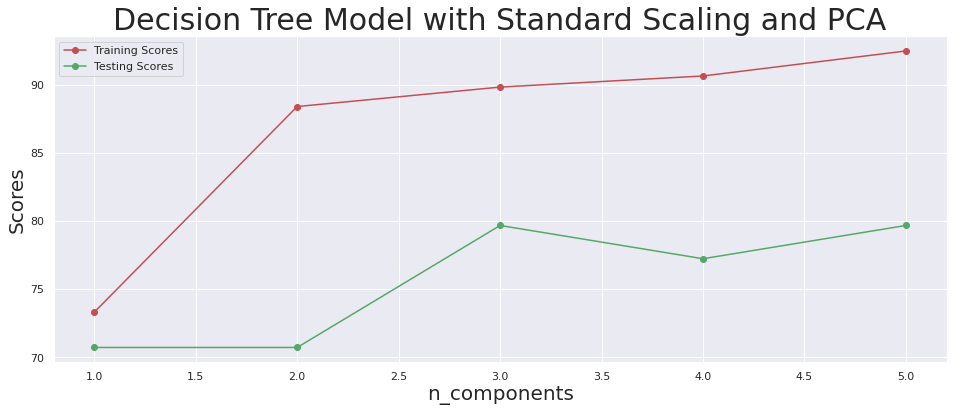

Max_Depth :  9
(73.31975560081466, 70.73170731707317)
(88.39103869653768, 70.73170731707317)
(89.81670061099797, 79.67479674796748)
(90.63136456211812, 77.23577235772358)
(92.4643584521385, 79.67479674796748)


In [265]:
for max_depth in range(3, 10):
    training_scores = []
    testing_scores = []
    n_components = list(range(1, 6))
    for n_component in n_components:
        # Converting Train Data to Same Scale
        standard_scaler = StandardScaler()
        # Scaling training samples
        scaled_X_train = standard_scaler.fit_transform(X_train)
        # Scaling testing samples
        scaled_X_test = standard_scaler.transform(X_test)

        # PCA Implementation
        pca = PCA(n_components = n_component)
        pca_X_train = pca.fit_transform(scaled_X_train)
        pca_X_test = pca.transform(scaled_X_test)

        decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
        decision_tree_model.fit(pca_X_train, y_train)
        training_scores.append(decision_tree_model.score(pca_X_train, y_train) * 100)
        testing_scores.append(decision_tree_model.score(pca_X_test, y_test) * 100)

    plt.figure(figsize = (16, 6))
    plt.plot(n_components, training_scores, 'ro-')
    plt.plot(n_components, testing_scores, 'go-')
    plt.xlabel('n_components', fontsize = 20)
    plt.ylabel('Scores', fontsize = 20)
    plt.title('Decision Tree Model with Standard Scaling and PCA', fontsize = 30)
    # plt.ylim(60, 90)
    plt.legend(labels = ['Training Scores', 'Testing Scores'])
    plt.show()
    
    # Let's print the corresponding Training and Testing Scores
    print("Max_Depth : ", max_depth)
    for scores in zip(training_scores, testing_scores):
        print(scores)

#### With PCA, Statndard Scaling and Decision Tree Classifier, we can get a Training accuracy of 85% and a Testing accuracy of 83%

<br><br>

# A Final overview of different kind of Model Based on their performance

## Simple Logistic Regression Model without Standard Scaling and without PCA :
- Training Samples with random_state = 3
- Training Accuracy : 80.04073319755601%
- Testing Accuracy  : 86.1788617886179%

## Logistic Model with Standard Scaling and PCA :
- Can't get a good model

## Decision Tree Classifier Model without Standard Scaling and without PCA :
- random_state = 3
- Max-Depth = 8
- Training Accuracy : 85.53 %
- Testing Accuracy  : 85.36 %

## Decision Tree Classifier Model with Standard Scaling and without PCA :
- random_state = 3
- Max-Depth = 8
- Training Accuracy : 85.74 %
- Testing Accuracy  : 85.36 %

## Decision Tree Classifier Model with Standard Scaling and with PCA :
- random_state = 3
- Max-Depth = 6
- n_components (PCA) = 5
- Training Accuracy : 84.92 %
- Testing Accuracy  : 83.73 %

## Building Optimal Model with Decision Tree without Standard Scaling and without PCA

In [266]:
feature_values = feature_columns.values
prediction_values = loan_train['Loan_Status'].values

In [267]:
decision_tree_model = DecisionTreeClassifier(max_depth = 8)
decision_tree_model.fit(feature_values, prediction_values)

print("Score : ", decision_tree_model.score(feature_values, prediction_values))

Score :  0.8762214983713354


# Test Data Predictions

In [268]:
loan_test = pd.read_csv('test.csv')
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [269]:
loan_test = loan_test.loc[:, prediction_features]
loan_test.head()

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Dependents
0,1.0,110.0,5720,0,0
1,1.0,126.0,3076,1500,1
2,1.0,208.0,5000,1800,2
3,NaN,100.0,2340,2546,2
4,1.0,78.0,3276,0,0


In [270]:
# Preprocessing Test Data

#  Checking for null values
loan_test.isnull().sum()

Credit_History       29
LoanAmount            5
ApplicantIncome       0
CoapplicantIncome     0
Dependents           10
dtype: int64

##### The major feature for our model prediction is credit_history
##### so we are going to remove the samples having null values on Credit_History

In [271]:
loan_test = loan_test.dropna(how = 'any')

In [272]:
loan_test.isnull().sum()

Credit_History       0
LoanAmount           0
ApplicantIncome      0
CoapplicantIncome    0
Dependents           0
dtype: int64

In [273]:
# TODO : Encoding Categorical data into NUmerical Data
loan_test['Dependents'] = loan_test['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

In [274]:
loan_test['Loan_Status_Predicted'] = decision_tree_model.predict(loan_test.values)

In [275]:
loan_test.head(25)

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Dependents,Loan_Status_Predicted
0,1.0,110.0,5720,0,0,Y
1,1.0,126.0,3076,1500,1,Y
2,1.0,208.0,5000,1800,2,Y
4,1.0,78.0,3276,0,0,Y
5,1.0,152.0,2165,3422,0,Y
6,1.0,59.0,2226,0,1,N
7,0.0,147.0,3881,0,2,N
8,1.0,280.0,13633,0,2,Y
9,1.0,123.0,2400,2400,0,Y
10,1.0,90.0,3091,0,0,Y


In [276]:
loan_test.Loan_Status_Predicted.value_counts()

Y    250
N     76
Name: Loan_Status_Predicted, dtype: int64

- Finally we finishes the project. 

- We have built a Decision Tree Classifier which performs well with selected features such as Credit_History, LoanAmount, ApplicantIncome, CoapplicantIncome and Dependents having the Training accuracy of 85.53% and Testing accuracy of 85.36%.
